Heart Disease Classifier Using Logistic Regression

In [16]:
import pandas as pd
df = pd.read_csv('heart_cleveland_upload.csv')

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [7]:
df.isnull().sum()
X = df.drop('condition', axis=1)
y = df['condition']

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [10]:
y_pred=model.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("accuracy",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

accuracy 0.7333333333333333
              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60

[[23  9]
 [ 7 21]]


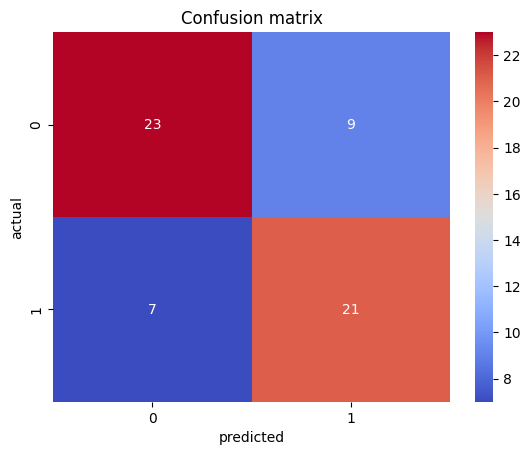

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='coolwarm')
plt.title("Confusion matrix")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

In [19]:

sample_input = [[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]]
prediction = model.predict(sample_input)
# Output result
print("Prediction:", "Has Heart Disease" if prediction[0] == 1 else "No Heart Disease")

Prediction: No Heart Disease


c:\Users\a\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [20]:
import joblib

# Save the trained model
joblib.dump(model, 'heart_model.pkl')

['heart_model.pkl']